In [40]:
#import datasets
from aif360.datasets import StandardDataset
from aif360.datasets import CompasDataset
#import fairness metrics
from aif360.datasets import BinaryLabelDataset 
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import itertools 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

import sys
import importlib
import custom_metric 
importlib.reload(custom_metric)
from custom_metric import random_metrics_scores_table
from custom_metric import plot_metrics

In [41]:

random_metrics_scores_table[:4]


,grp_dist,true_dist,pred_dist,BAC,Custom Metric,GEI,statistical_parity_diff,disparate_impact,eq_opp_diff,theil_index,false_positive_rate
0,50/50,50/50,50/50,0.540000,0.980769,0.220877,0.081731,1.170000,0.009662,0.306384,0.480000
1,50/50,50/50,80/20,0.511441,1.612903,0.371137,0.017262,1.057181,0.020833,0.497283,0.297872
2,50/50,50/50,90/10,0.538739,2.631579,0.418274,0.042955,1.252955,0.177083,0.562547,0.148936
3,50/50,50/50,70/30,0.478322,1.388889,0.363696,0.083501,1.260325,0.068452,0.486972,0.382979


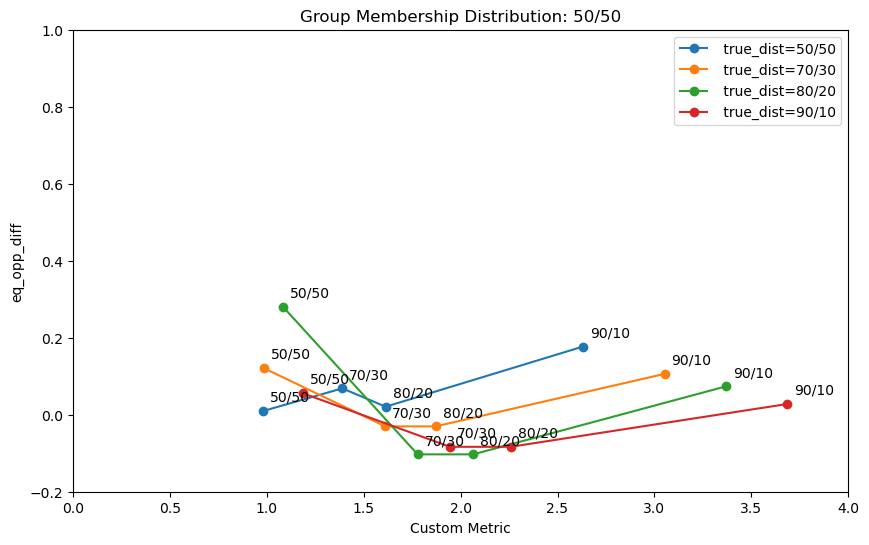

In [45]:
plot_metrics(
    df=random_metrics_scores_table,
    filter_df={'grp_dist': '50/50'},
    x_axis='Custom Metric',
    y_axis='eq_opp_diff',
    groupby_col='true_dist',
    pred_annotations='pred_dist',
    title='Group Membership Distribution: 50/50',
    xlim=(0, 4),
    ylim=(-0.2, 1)
)

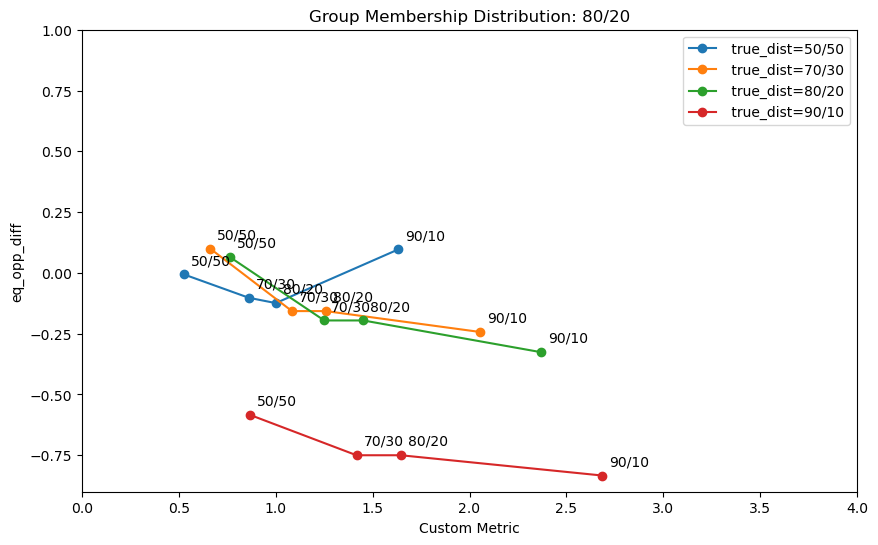

In [46]:
plot_metrics(
    df=random_metrics_scores_table,
    filter_df={'grp_dist': '80/20'},
    x_axis='Custom Metric',
    y_axis='eq_opp_diff',
    groupby_col='true_dist',
    pred_annotations='pred_dist',
    title='Group Membership Distribution: 80/20',
    xlim=(0, 4),
    ylim=(-0.9, 1)
)

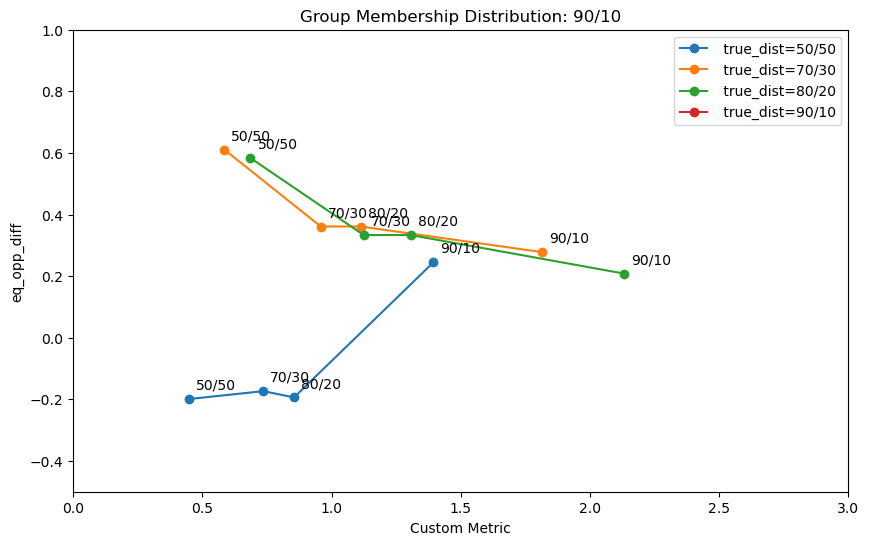

In [47]:
plot_metrics(
    df=random_metrics_scores_table,
    filter_df={'grp_dist': '90/10'},
    x_axis='Custom Metric',
    y_axis='eq_opp_diff',
    groupby_col='true_dist',
    pred_annotations='pred_dist',
    title='Group Membership Distribution: 90/10',
    xlim=(0, 3),
    ylim=(-0.5, 1)
)

- when group and true label distributions are 90/10, equal opportunity score is a NaN value
- so it is not plotted.

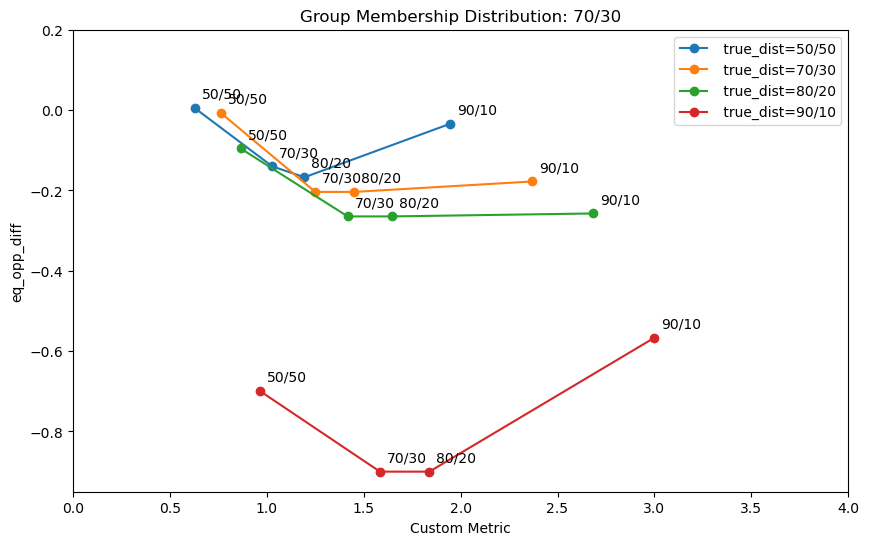

In [49]:
plot_metrics(
    df=random_metrics_scores_table,
    filter_df={'grp_dist': '70/30'},
    x_axis='Custom Metric',
    y_axis='eq_opp_diff',
    groupby_col='true_dist',
    pred_annotations='pred_dist',
    title='Group Membership Distribution: 70/30',
    xlim=(0, 4),
    ylim=(-0.95, 0.2)
)